In [1]:
#This code replicates Model SIM (from Godley and Lavoie 2007)
#Created by Marco Veronese Passarella
#April 24th, 2020

In [2]:
%%html
<script>
    // AUTORUN ALL CELLS ON NOTEBOOK-LOAD!
    require(
        ['base/js/namespace', 'jquery'], 
        function(jupyter, $) {
            $(jupyter.events).on("kernel_ready.Kernel", function () {
                console.log("Auto-running all cells-below...");
                jupyter.actions.call('jupyter-notebook:run-all-cells-below');
                jupyter.actions.call('jupyter-notebook:save-notebook');
            });
        }
    );
</script>

In [3]:
#Import packages
%matplotlib inline
from ipywidgets import interactive 
import matplotlib.pyplot as plt 
import numpy as np

In [4]:
#Set number of periods
nperiods=100

#Define variables as matrices of zeros (or ones)
y = np.zeros([6,nperiods],dtype = float)
cons = np.zeros([6,nperiods],dtype = float)
gov = np.zeros([6,nperiods],dtype = float)
tax = np.zeros([6,nperiods],dtype = float)
yd = np.zeros([6,nperiods],dtype = float)
h_h = np.zeros([6,nperiods],dtype = float)
h_s = np.zeros([6,nperiods],dtype = float)
n = np.zeros([6,nperiods],dtype = float)
w = np.ones([6,nperiods],dtype = float)
sav = np.zeros([6,nperiods],dtype = float)

#Identify coefficients
alpha1=0.6*np.ones([6,nperiods],dtype = float)
alpha2=0.4
theta=0.2

In [5]:
#Create model using three loops (time, iterations and scenarios)
i = 1 #Time index
z = 1 #Iteration index
j = 0 #Scenario index

for j in range(0,6): 
    for i in range(1,nperiods):
        for z in range (1,20):
            
            if i > 70 and j == 1: alpha1[j,i]=0.70
            if i > 70 and j == 2: alpha1[j,i]=0.75
            if i > 70 and j == 3: alpha1[j,i]=0.80
            if i > 70 and j == 4: alpha1[j,i]=0.85    
            if i > 70 and j == 5: alpha1[j,i]=0.90    
            
            y[j,i]=cons[j,i]+gov[j,i]                         #Output (income) 
            cons[j,i]=alpha1[j,i]*yd[j,i] + alpha2*h_h[j,i-1] #Consumption
            n[j,i]=y[j,i]/w[j,i]                              #Employment
            tax[j,i]=theta*w[j,i]*n[j,i]                      #Taxes
            yd[j,i]=w[j,i]*n[j,i]-tax[j,i]                    #Disposable income
            h_s[j,i]=h_s[j,i-1]+gov[j,i]-tax[j,i]             #Supply of money
            h_h[j,i]=h_h[j,i-1]+yd[j,i]-cons[j,i]             #Demand for money
            sav[j,i]=h_h[j,i]-h_h[j,i-1]                      #Saving (not included in original model)
            if i > 5: gov[j,i] = 20                           #Government spending (trigger)
            z += 1
        i += 1
    j += 1

In [6]:
#Create auxiliary variable (time)
time = np.linspace(0, nperiods, nperiods)

(0.0, 50.0, 0.0, 110.0)

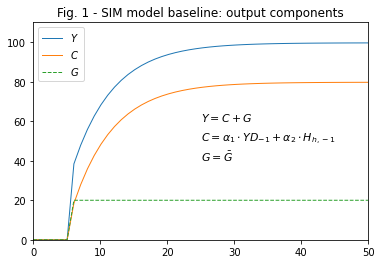

In [7]:
#Plot output components under baseline
plt.plot(time,y[0,],lw=1)
plt.title('Fig. 1 - SIM model baseline: output components')
plt.plot(time,cons[0,],lw=1)
plt.plot(time,gov[0,],'--',lw=1)
plt.text(25, 60,r"$Y=C+G$", horizontalalignment='left', fontsize=11);
plt.text(25, 50,r"$C=\alpha_1 \cdot YD_{-1}+\alpha_2 \cdot H_{h,-1}$", horizontalalignment='left', fontsize=11);
plt.text(25, 40,r"$G=\bar{G}$", horizontalalignment='left', fontsize=11);
plt.legend(('$Y$','$C$','$G$'), loc='upper left')
plt.axis([0, 50, 0, 110])

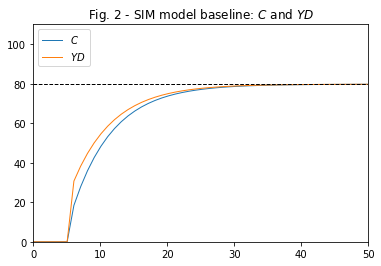

In [8]:
#Plot consumption and disposable income (Figure 3.2 in Godley and Lavoie 2007)
plt.plot(time,cons[0,],lw=1)
plt.title('Fig. 2 - SIM model baseline: $C$ and $YD$')
plt.plot(time,yd[0,],lw=1)
plt.legend(('$C$','$YD$'), loc='upper left')
plt.axis([0, 50, 0, 110])
ceiling = np.linspace(80, 80, nperiods)
plt.plot(ceiling,'k--',lw=1)

Text(0.4, -0.1, 'Fig. 3 - SIM model baseline: $H_h$ and $\\Delta H_h$')

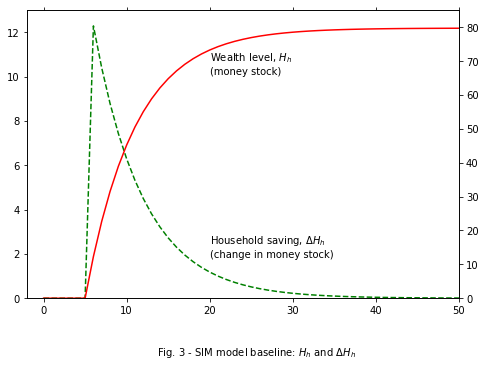

In [9]:
#Plot wealth and saving (Figure 3.3 in Godley and Lavoie 2007)
#Note: different plot options
fig=plt.figure()
axes = fig.add_axes([0.1, 0.1, 1.0, 1.0])
axes.tick_params(top='off')
axes.set_ylim(0, 13)
axes.set_xlim(-2, 50)
axes.plot(sav[0,], linestyle='--', color='g')
axes2 = axes.twinx()
axes2.set_ylim(0, 85)
axes2.set_xlim(-2, 50)
axes2.plot(h_h[0,], 'r')
plt.text(20, 16, 'Household saving, $\Delta H_h$')
plt.text(20, 12, '(change in money stock)')
plt.text(20, 70, 'Wealth level, $H_h$')
plt.text(20, 66, '(money stock)')
fig.text(0.4,-0.1,'Fig. 3 - SIM model baseline: $H_h$ and $\Delta H_h$')

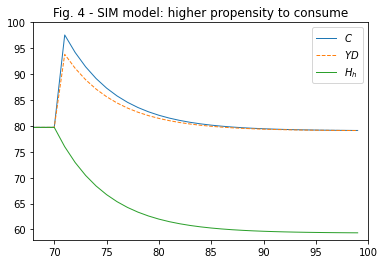

In [10]:
#Plot consumption, disposable income and wealth (cash) following shock
#to propensity to consume (Figure 3.8 in Godley and Lavoie 2007)
plt.plot(cons[1,],lw=1)
plt.title('Fig. 4 - SIM model: higher propensity to consume')
plt.plot(yd[1,],'--',lw=1)
plt.plot(h_h[1,],lw=1)
plt.legend(('$C$','$YD$','$H_h$'), loc='upper right')
plt.axis([68, 100, 58, 100])
ceiling = np.linspace(80, 80, nperiods)

In [11]:
#Create interactive plot of Figure 4 (1/2)
def f(j):
    plt.figure()
    time = np.linspace(0, nperiods, nperiods)
    plt.plot(time,cons[j,],lw=1)
    plt.plot(time,yd[j,],'--',lw=1)
    plt.plot(time,h_h[j,],lw=1)
    plt.ylim(0, 110)
    plt.text(71, 190, 'Select shock to propensity to consume')
    plt.text(68, -20, 'Note: 0 = 60%, 1 = 70%; 2 = 75%, 3 = 80%; 4 = 85%; 5 = 90%')
    plt.legend(('$C$','$YD$','$H_h$'), loc='upper right')
    plt.axis([68, 100, 10, 170])
    plt.show()

In [12]:
#Create interactive plot of Figure 4 (2/2)
interactive_plot = interactive(f, j=(0,5,1))
output = interactive_plot.children[-1]
output.layout.height = '350px'
display(interactive_plot)

interactive(children=(IntSlider(value=2, description='j', max=5), Output(layout=Layout(height='350px'))), _dom…